In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [35]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [37]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [38]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [39]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

([<matplotlib.axis.XTick at 0x20b00070950>,
 [Text(True, 0, 'not Transported'), Text(False, 0, 'Transported')])

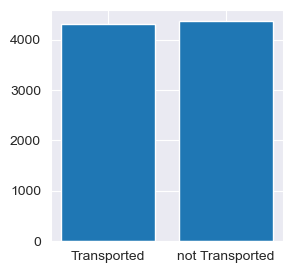

In [40]:
plt.figure(figsize=(3, 3))
plt.bar(train['Transported'].value_counts().index, train['Transported'].value_counts())
plt.xticks(train['Transported'].value_counts().index, ['not Transported', 'Transported'])

In [41]:
# 도착률이 거의 절반임
# 가설: 도착률이 나이와 연관이 있을까?

<Axes: xlabel='Age'>

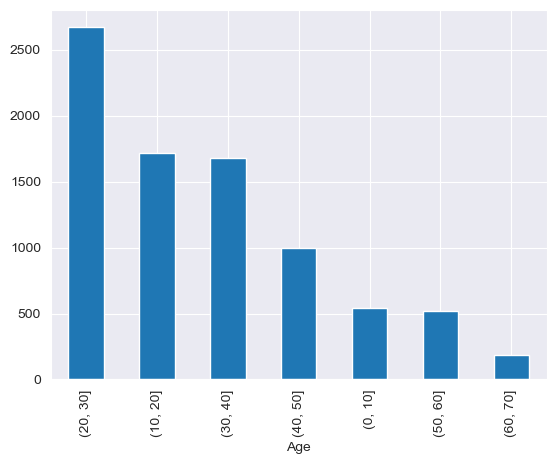

In [42]:
pd.cut(train['Age'], bins=range(0, int(train['Age'].max())+1, 10)).value_counts().plot(kind='bar')

In [43]:
# 20-30세 탑승자가 가장 많음

<Axes: xlabel='Age', ylabel='Count'>

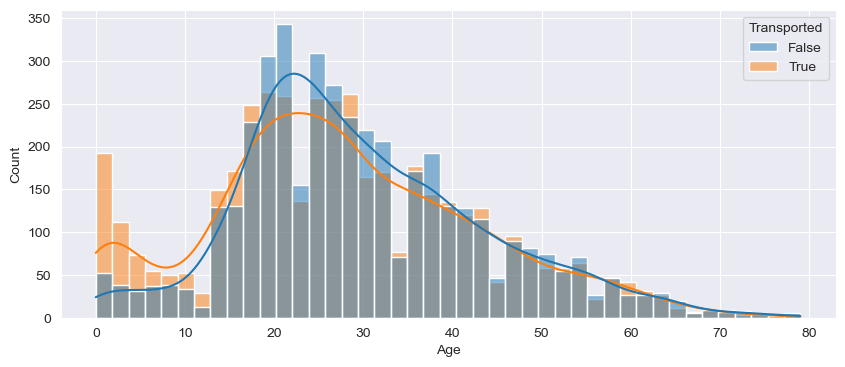

In [44]:
plt.figure(figsize=(10, 4))
sns.histplot(x='Age', data=train, hue='Transported', kde=True)

In [45]:
# 0-10세의 도착률이 높고 함선에 가장 많이 탑승한 20-30세의 도착률이 낮다

<Axes: xlabel='HomePlanet', ylabel='count'>

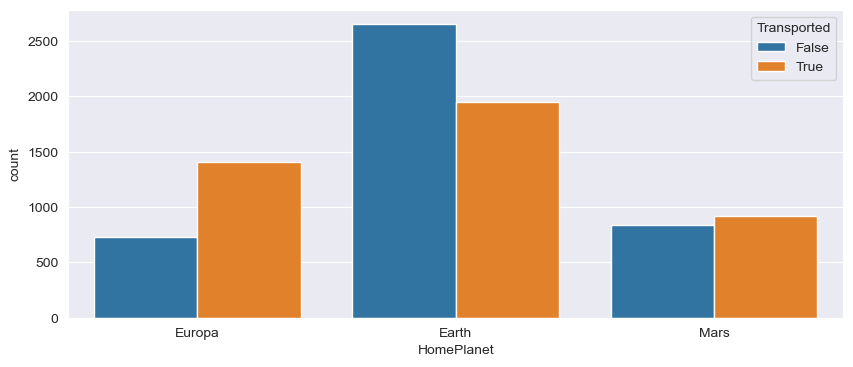

In [46]:
plt.figure(figsize=(10, 4))
sns.countplot(x='HomePlanet', data=train, hue='Transported')

In [47]:
# earth에서 출발한 사람은 도착률이 낮고 europa에서 출발하는 승객은 도착률이 높다

<Axes: xlabel='CryoSleep', ylabel='count'>

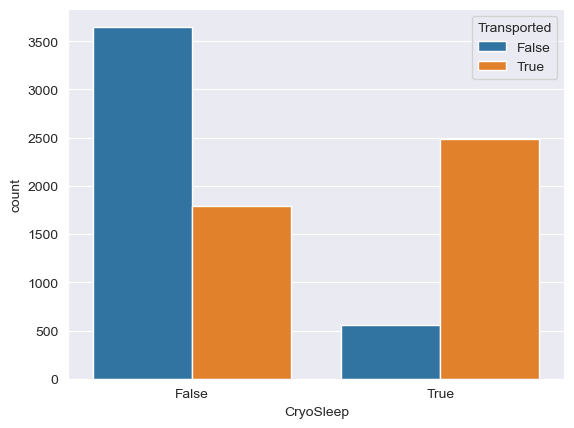

In [48]:
sns.countplot(x='CryoSleep', data=train, hue='Transported')

In [49]:
# cryosleep이용 승객은 도착률이 매우 높다

<Axes: xlabel='VIP', ylabel='count'>

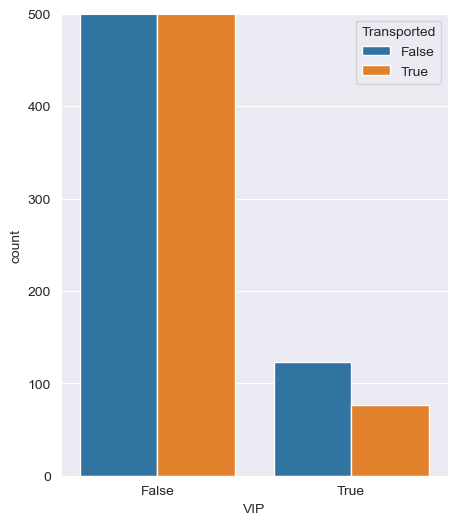

In [50]:
plt.figure(figsize=(5, 6))
plt.ylim(0, 500)
sns.countplot(x='VIP', data=train, hue='Transported')

In [51]:
train[['VIP', 'Transported']].groupby('VIP').value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

In [52]:
# vip가 아닌 승객이 더 많고 vip승객의 도착률이 더 낮다.

<Axes: xlabel='Destination', ylabel='count'>

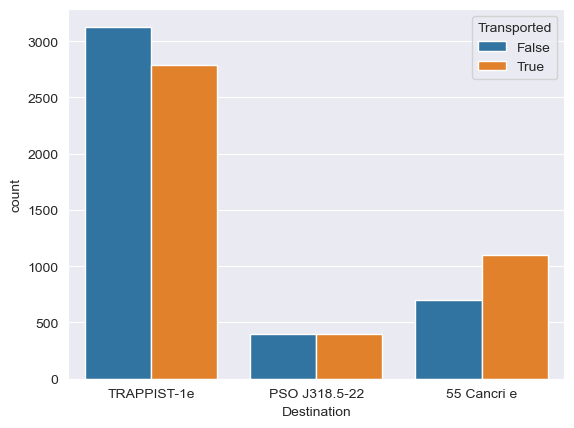

In [53]:
sns.countplot(x='Destination', data=train, hue='Transported')

In [54]:
# 다수의 승객이 trappist-1e가 목적지이고 55 cancri e가 목적지인 승객이 도착률이 높다

In [55]:
def positive_num_split(dataframe: pd.DataFrame, col: str, div_num: int, col_name: str) -> pd.DataFrame:
    lst = []
    for i in dataframe[col]:
        if pd.isna(i):
            lst.append(None)
        elif i >= 0:
            range_num = int(i) // div_num
            lst.append(f"{range_num * div_num}-{(range_num + 1) * div_num}")
    return pd.DataFrame(lst, columns=[col_name])

<Axes: xlabel='age range', ylabel='count'>

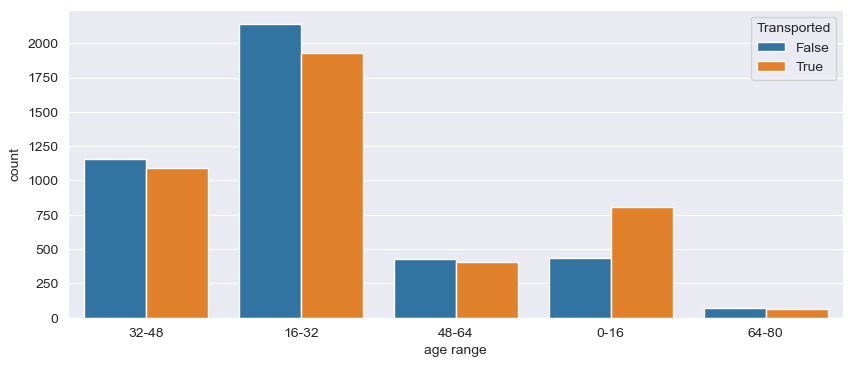

In [56]:
sep_age = positive_num_split(dataframe=train, col='Age', div_num=16, col_name='age range')

plt.figure(figsize=(10, 4))
sns.countplot(x='age range', hue='Transported', data=sep_age.join(train))

In [57]:
# 나이 구간을 16세 단위로 나눈 결과, 0-16세의 경우 도착할 가능성이 더 높고, 16-64세의 경우 가능성이 조금 낮다, 64-80세는 비슷한 비율로 도착한다.

In [58]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

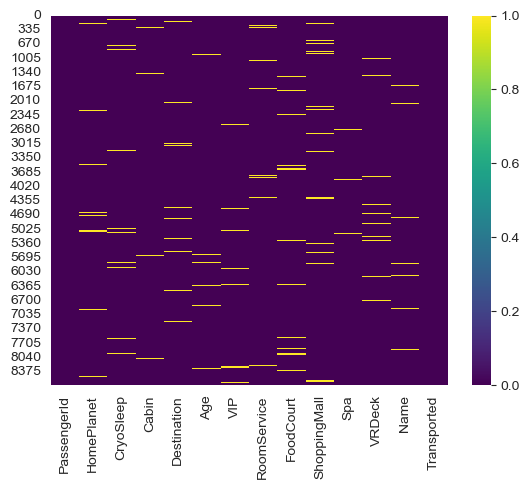

In [59]:
sns.heatmap(train.isnull(), cmap='viridis')
plt.show()

In [60]:
# 데이터형태 변환

In [61]:
cols = ['CryoSleep', 'VIP']
train[cols] = train[cols].astype(bool)
test[cols] = train[cols].astype(bool)

In [62]:
# 서비스를 이용한 승객과 도착에 관계가 있는지?

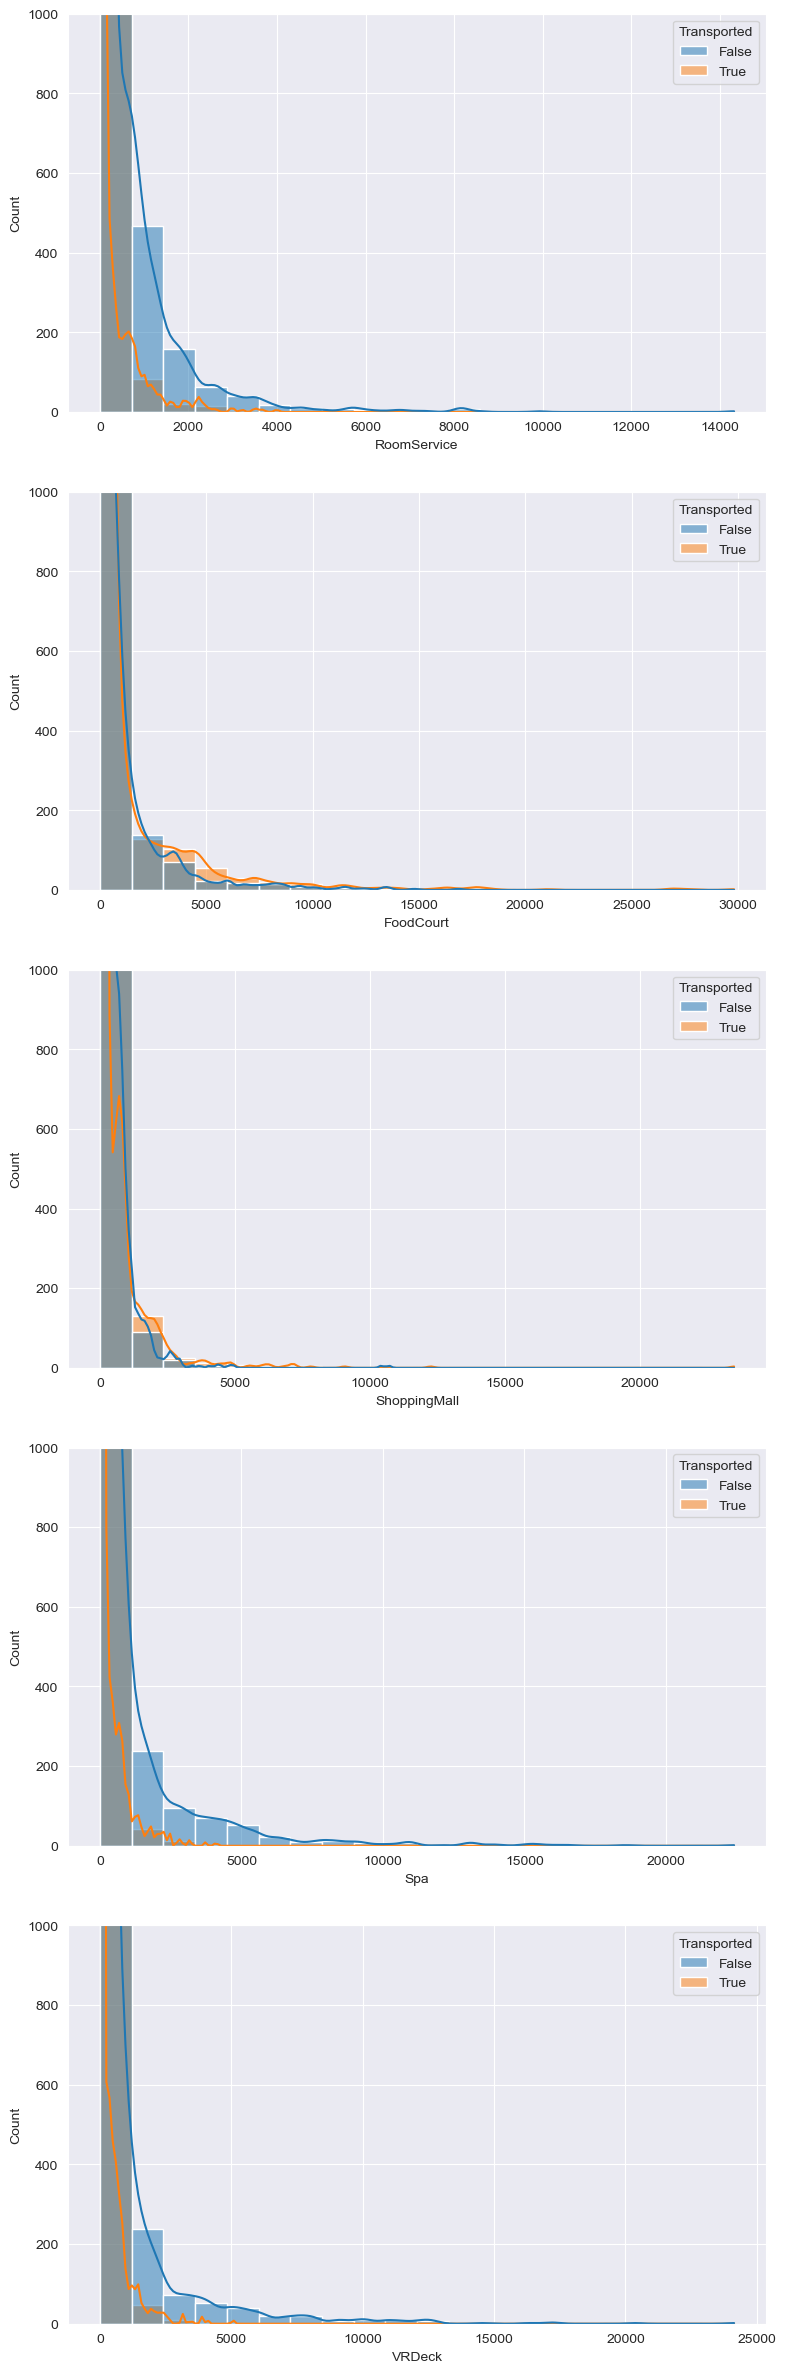

In [63]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(9, 30))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    plt.ylim(0, 1000)
    sns.histplot(data=train, x=col, hue='Transported', kde=True, bins=20)

In [64]:
# 함선의 승객들 대다수가 돈을 많이 안 쓰고 도착률과 관계가 거의 없다?

In [65]:
def str_split_grouping(dataframe: pd.DataFrame, col: str, split_str: str) -> None:
    dataframe[['group', 'member']] = dataframe[col].str.split(split_str, expand=True)
    group_size = dataframe.groupby('group').size()
    grouping_member = set(group_size[group_size > 1].index)
    dataframe['solo'] = ~dataframe['group'].isin(grouping_member)
    dataframe['group_size'] = dataframe['group'].map(group_size).fillna(0).astype(int)

In [66]:
str_split_grouping(train, 'PassengerId', '_')
str_split_grouping(test, 'PassengerId', '_')

In [67]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,member,solo,group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


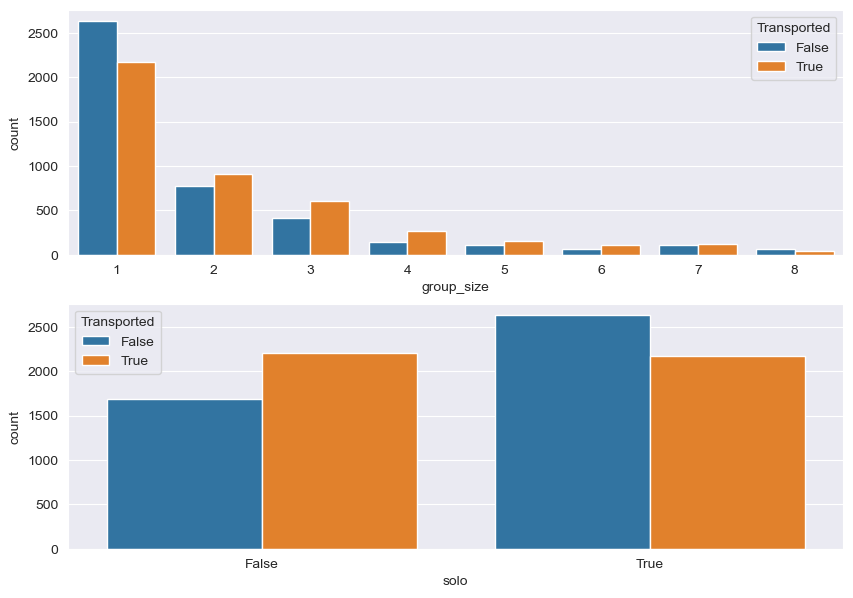

In [68]:
cols = ['group_size', 'solo']

plt.figure(figsize=(10,7))
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.countplot(data=train, x=col, hue='Transported')

In [69]:
# 대부분의 승객이 집단이 없는 혼자 여행한다, 혼자 여행하는 승객은 도착할 확률이 집단을 이룬 승객보다 낮다.
# 집단을 이룬 승객이 도착할 확률이 높다

In [70]:
train[['deck', 'num', 'side']] = train['Cabin'].str.split('/', expand=True)
test[['deck', 'num', 'side']] = test['Cabin'].str.split('/', expand=True)

In [71]:
train['deck'].fillna(train['deck'].mode()[0], inplace=True)
train['num'].fillna(train['num'].mode()[0], inplace=True)
train['side'].fillna(train['side'].mode()[0], inplace=True)

<Axes: xlabel='deck', ylabel='count'>

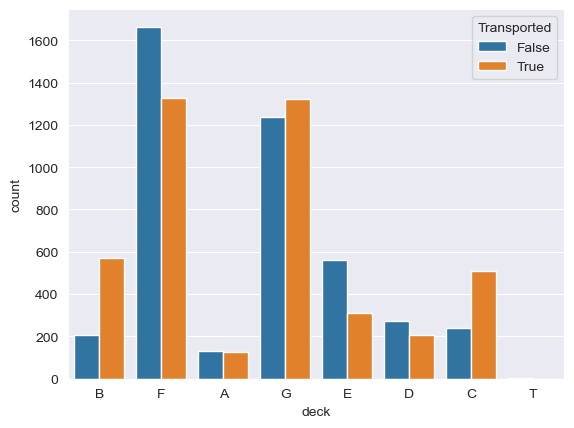

In [72]:
sns.countplot(data=train, x=train['deck'], hue='Transported')

<Axes: xlabel='side', ylabel='count'>

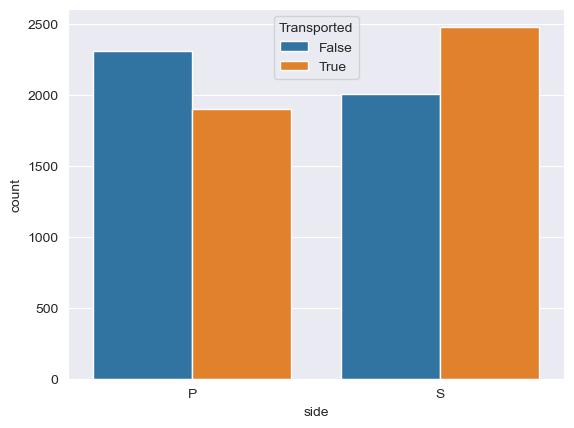

In [73]:
sns.countplot(data=train, x=train['side'], hue='Transported')

In [74]:
train.isna().sum().sort_values(ascending=False)

ShoppingMall    208
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
member            0
num               0
deck              0
group_size        0
solo              0
PassengerId       0
group             0
Transported       0
VIP               0
CryoSleep         0
side              0
dtype: int64

In [75]:
train['HomePlanet'].fillna('Mars', inplace=True)
train['Destination'].fillna('PSO J318.5-22', inplace=True)

cols = ['ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'FoodCourt']
train[cols] = train[cols].fillna(0)

train['Age'].fillna(train['Age'].median(), inplace=True)

In [76]:
train.isna().sum().sort_values(ascending=False)

Name            200
Cabin           199
PassengerId       0
VRDeck            0
num               0
deck              0
group_size        0
solo              0
member            0
group             0
Transported       0
Spa               0
HomePlanet        0
ShoppingMall      0
FoodCourt         0
RoomService       0
VIP               0
Age               0
Destination       0
CryoSleep         0
side              0
dtype: int64

In [77]:
del_col = ['PassengerId', 'Cabin', 'Name']
train.drop(del_col, axis=1, inplace=True)

In [78]:
y = train['Transported'].copy()
train.drop('Transported', axis=1, inplace=True)
x = train.copy()

In [79]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [80]:
# 데이터 합치기

In [81]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,member,solo,group_size,deck,num,side,PassengerId,Cabin,Name
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,True,1,B,0,P,NaN,NaN,NaN
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,True,1,F,0,S,NaN,NaN,NaN
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,False,2,A,0,S,NaN,NaN,NaN
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,False,2,A,0,S,NaN,NaN,NaN
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,True,1,F,1,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,False,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,9266,02,False,2,G,1496,S,9266_02,G/1496/S,Jeron Peter
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,9269,01,True,1,NaN,NaN,NaN,9269_01,NaN,Matty Scheron
12967,Mars,False,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,9271,01,True,1,D,296,P,9271_01,D/296/P,Jayrin Pore
12968,Europa,False,NaN,NaN,True,0.0,2680.0,0.0,0.0,523.0,9273,01,True,1,D,297,P,9273_01,D/297/P,Kitakan Conale


In [82]:
data['HomePlanet'].fillna('Mars', inplace=True)
data['Destination'].fillna('PSO J318.5-22', inplace=True)

cols = ['ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'FoodCourt']
data[cols] = data[cols].fillna(0)

data['Age'].fillna(test['Age'].mode()[0], inplace=True)

In [83]:
data['deck'].fillna(train['deck'].mode()[0], inplace=True)
data['num'].fillna(train['num'].mode()[0], inplace=True)
data['side'].fillna(train['side'].mode()[0], inplace=True)

In [84]:
del_col = ['PassengerId', 'Cabin', 'Name']
data.drop(del_col, axis=1, inplace=True)

In [85]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,member,solo,group_size,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,True,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,True,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,False,2,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,False,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,True,1,F,1,S


In [86]:
data.isna().sum().sort_values(ascending=False)

HomePlanet      0
VRDeck          0
num             0
deck            0
group_size      0
solo            0
member          0
group           0
Spa             0
CryoSleep       0
ShoppingMall    0
FoodCourt       0
RoomService     0
VIP             0
Age             0
Destination     0
side            0
dtype: int64

In [87]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,member,solo,group_size,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,True,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,True,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,False,2,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,False,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,True,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,False,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,9266,02,False,2,G,1496,S
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,9269,01,True,1,F,82,S
12967,Mars,False,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,9271,01,True,1,D,296,P
12968,Europa,False,PSO J318.5-22,18.0,True,0.0,2680.0,0.0,0.0,523.0,9273,01,True,1,D,297,P


In [88]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [89]:
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,member,solo,group_size,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,True,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,True,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,False,2,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,False,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,True,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,9276,01,True,1,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,9278,01,True,1,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,9279,01,True,1,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,9280,01,False,2,E,608,S
